Why Explore Seasonality?
Seasonality in time-series data refers to a pattern that occurs at a regular interval. This is different from regular cyclic trends, such as the rise and fall of stock prices, that re-occur regularly but don’t have a fixed period. There’s a lot of insight to be gained from understanding seasonality patterns in your data and you can even use it as a baseline to compare your time-series machine learning models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


We are using data published by the Quebec Professional Association of Real Estate Brokers. The association publishes monthly real estate stats. For convenience, I’ve put the monthly median condo prices for the Province of Quebec and the Montreal Metropolitan Area into a CSV file, available here: https://meritusintelytics-my.sharepoint.com/:x:/g/personal/dhawal_goyal_merilytics_com/EdQeu-TOf8xJnIhPklwFSmIBWwii3zjld9mV3vBeE9XZgQ?e=OYdcow

In [2]:
data_orig = pd.read_csv('quebec_real_estate.csv')

In [3]:
data_orig['Date'] = pd.to_datetime(data_orig['Date']) # convert date column to DateTime


The quickest way to get an idea of whether or not your data has a seasonal trend is by plotting it. Let’s see what we get when we plot the median house price in Montreal by month.

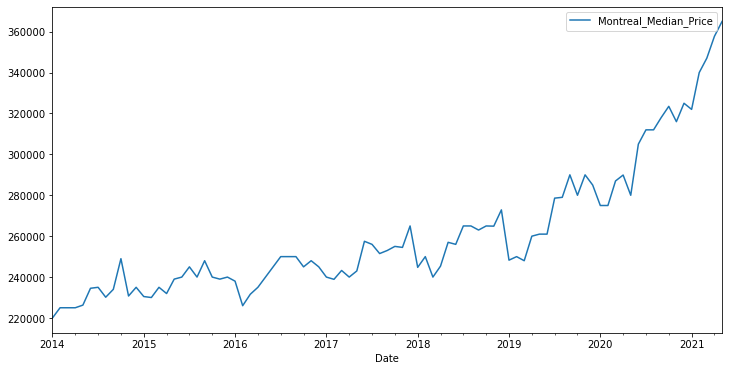

In [4]:
ax = data_orig.plot(x='Date', y='Montreal_Median_Price', figsize=(12,6))

We can see from this plot that the prices seem to dip around the new year and peak a few months before, around late summer. Let’s dive a little further into this by plotting a vertical line for January of every year.

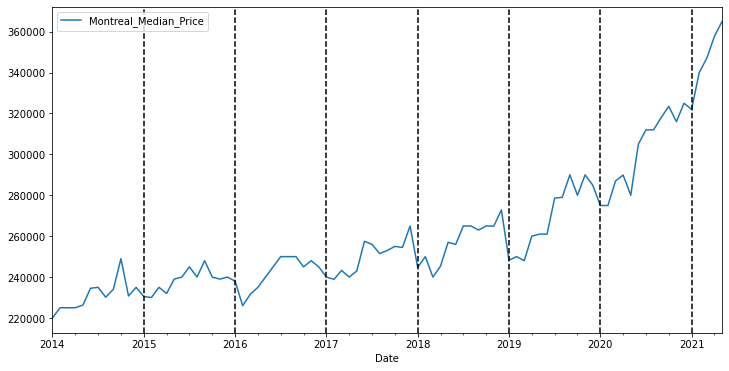

In [5]:
ax = data_orig.plot(x='Date', y='Montreal_Median_Price', figsize=(12,6))
xcoords = ['2015-01-01', '2016-01-01','2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
          '2021-01-01']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

The seasonal_decompose model requires you to select a model type for the seasonality (additive or multiplicative). We’ll select a multiplicative model since it would appear the amplitude of the cycles is increasing with time. This would make sense since a large factor for housing prices is lending rates which are done as a percentage of the price.

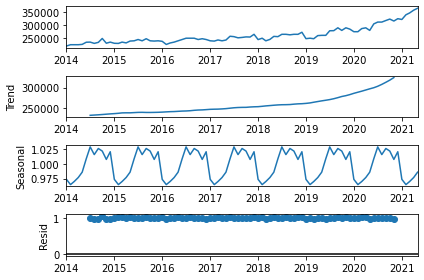

In [6]:
data_orig.set_index('Date', inplace=True)
analysis = data_orig[['Montreal_Median_Price']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();